In [60]:
import numpy as np
import networkx as nx

# Creating a graph

In [61]:
G = nx.Graph()

# Nodes

In [62]:
G.add_node(1)
G.add_nodes_from([2, 3])
G.add_nodes_from([
    (4, {'color': 'red'}),
    (5, {'color': 'green'})
])

In [63]:
# Nodes from one graph can be incorporated into another:
H = nx.path_graph(10)   # like a linked list
G.add_nodes_from(H)

In [64]:
G.add_node(H)

# Edges

In [65]:
G.add_edge(1, 2)
e = (2, 3)
G.add_edge(*e)
G.add_edges_from([(1, 2), (1, 3)])
G.add_edges_from(H.edges)

In [66]:
# G.clear()

In [67]:
G.number_of_edges(), G.number_of_nodes()

(10, 11)

In [68]:
DG = nx.DiGraph()
DG.add_edge(2, 1)   # adds the nodes in order 2, 1
DG.add_edge(1, 3)
DG.add_edge(2, 4)
DG.add_edge(1, 2)
assert list(DG.successors(2)) == [1, 4]     # an iterator over successor nodes of node 2
assert list(DG.edges) == [(2, 1), (2, 4), (1, 3), (1, 2)]

# Examining elements of a graph

In [69]:
list(G.nodes)

[1, 2, 3, 4, 5, 0, 6, 7, 8, 9, <networkx.classes.graph.Graph at 0x22422476670>]

In [70]:
list(G.edges)

[(1, 2),
 (1, 3),
 (1, 0),
 (2, 3),
 (3, 4),
 (4, 5),
 (5, 6),
 (6, 7),
 (7, 8),
 (8, 9)]

In [71]:
list(G.adj[1])

[2, 3, 0]

In [72]:
G.degree[1]

3

In [73]:
G.edges([2, 1])

EdgeDataView([(2, 1), (2, 3), (1, 3), (1, 0)])

In [74]:
G.degree([2, 3])

DegreeView({2: 2, 3: 3})

# Removing elements from a graph

In [75]:
G.remove_node(2)
G.remove_nodes_from("spam")
list(G.nodes)

[1, 3, 4, 5, 0, 6, 7, 8, 9, <networkx.classes.graph.Graph at 0x22422476670>]

# Using the graph constructors

In [82]:
G.add_edge(1, 2)
H = nx.DiGraph(G)
list(H.edges())

[(1, 3),
 (1, 0),
 (1, 2),
 (3, 1),
 (3, 4),
 (4, 3),
 (4, 5),
 (5, 4),
 (5, 6),
 (0, 1),
 (6, 5),
 (6, 7),
 (7, 6),
 (7, 8),
 (8, 7),
 (8, 9),
 (9, 8),
 (2, 1)]

In [84]:
edgelist = [(0, 1), (1, 2), (2, 3)]
H = nx.Graph(edgelist)
list(H.edges())

[(0, 1), (1, 2), (2, 3)]

In [85]:
adjacency_dict = {0: (1, 2), 1: (0, 2), 2:(0, 1)}
H = nx.Graph(adjacency_dict)
list(H.edges())

[(0, 1), (0, 2), (1, 2)]

# Accessing edges and neighbors

In [87]:
# An edge-tuple can be a 2-tuple of nodes or a 3-tuple with 2 nodes followed by an edge attribute dictionary
G = nx.Graph([(1, 2, {"color": "yellow"})])
G[1]    # same as G.adj[1]

AtlasView({2: {'color': 'yellow'}})

In [94]:
G[1][2]

{'color': 'yellow'}

In [96]:
G.edges[1, 2]

{'color': 'yellow'}

In [100]:
G.add_edge(1, 3)
G[1][3]['color'] = 'blue'
G.edges[1, 2]['color'] = 'red'
G.edges[1, 2]

{'color': 'red'}

In [103]:
FG = nx.Graph()
FG.add_weighted_edges_from([(1, 2, 0.125), (1, 3, 0.75), (2, 4, 1.2), (3, 4, 0.375)])
for n, nbrs in FG.adj.items():
    for nbr, eattr in nbrs.items():
        wt = eattr['weight']
        if wt < 0.5: print(f"{n}, {nbr}, {wt:.3}")


1, 2, 0.125
2, 1, 0.125
3, 4, 0.375
4, 3, 0.375


In [116]:
for u, v, wt in FG.edges.data('weight'):
    if wt < 0.5:
        print(f"({u}, {v}, {wt})")

(1, 2, 0.125)
(3, 4, 0.375)


# Adding attributes to graphs, nodes, and edges

In [117]:
G = nx.Graph(day='Friday')
G.graph

{'day': 'Friday'}

In [118]:
G.graph['day'] = "Monday"
G.graph

{'day': 'Monday'}

In [121]:
G.add_node(1, time='5pm')
G.add_nodes_from([3], time='2pm')
G.nodes[1]['room'] = 714
G.nodes.data()

NodeDataView({1: {'time': '5pm', 'room': 714}, 3: {'time': '2pm'}})

In [123]:
G.add_edge(1, 2, weight=4.7)
G.add_edges_from([(3, 4), (4, 5)], color='red')
G.add_edges_from([(1, 2, {'color': 'blue'}), (2, 3, {'weight': 8})])
G[1][2]['weight'] = 4.7
G.edges[3, 4]['weight'] = 4.2

In [124]:
DG = nx.DiGraph()
DG.add_weighted_edges_from([(1, 2, 0.5), (3, 1, 0.75)])
DG.out_degree(1, weight='weight')

0.5

In [125]:
DG.degree(1, weight='weight')

1.25

In [126]:
list(DG.successors(1))

[2]

In [127]:
list(DG.neighbors(1))

[2]

In [128]:
H = nx.Graph(DG)

# Multigraphs

In [129]:
MG = nx.MultiGraph()
MG.add_weighted_edges_from([(1, 2, 0.5), (1, 2, 0.75), (2, 3, 0.5)])
dict(MG.degree(weight='weight'))

{1: 1.25, 2: 1.75, 3: 0.5}

In [133]:
GG = nx.Graph()
for n, nbrs in MG.adjacency():
    for nbr, edict in nbrs.items():
        minvalue = min([d['weight'] for d in edict.values()])
        GG.add_edge(n, nbr, weight=minvalue)

In [134]:
nx.shortest_path(GG, 1, 3)

[1, 2, 3]

# Graph generators and graph operations

In [137]:
K_5 = nx.complete_graph(5)
K_3_5 = nx.complete_bipartite_graph(3 ,5)
barbell = nx.barbell_graph(10, 10)
lollipop = nx.lollipop_graph(10, 20)

# Analyzing graphs

In [139]:
G = nx.Graph()
G.add_edges_from([(1, 2), (1, 3)])
G.add_node("spam")
list(nx.connected_components(G))

[{1, 2, 3}, {'spam'}]

In [140]:
sorted(d for n, d in G.degree())

[0, 1, 1, 2]

In [141]:
nx.clustering(G)

{1: 0, 2: 0, 3: 0, 'spam': 0}

# Drawing graphs

In [142]:
import matplotlib.pyplot as plt

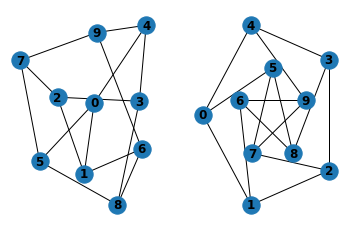

In [143]:
G = nx.petersen_graph()
subax1 = plt.subplot(121)
nx.draw(G, with_labels=True, font_weight='bold')
subax2 = plt.subplot(122)
nx.draw_shell(G, nlist=[range(5, 10), range(5)], with_labels=True, font_weight='bold')